In [1]:
'''
import pandas as pd
pd.set_option("display.max_rows", 550)
data = pd.read_csv("./res_fin.csv").sort_values(["count_mx__ngram_range","lda__n_components","accuracy_score","count_mx__max_df","count_mx__min_df"], ascending=[True,True,False,False,True])
data.reset_index(drop=True, inplace=True)
display(data.loc[1063:1594,])
'''

'\nimport pandas as pd\npd.set_option("display.max_rows", 550)\ndata = pd.read_csv("./res_fin.csv").sort_values(["count_mx__ngram_range","lda__n_components","accuracy_score","count_mx__max_df","count_mx__min_df"], ascending=[True,True,False,False,True])\ndata.reset_index(drop=True, inplace=True)\ndisplay(data.loc[1063:1594,])\n'

In [3]:
from AC import preproc
from AC import get_news
import inspect
import nltk
nltk.download("stopwords")

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astefani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
economia = get_news("../articoli_economia/")
cultura = get_news("../articoli_cultura/")
tech = get_news("../articoli_tech/")
politica = get_news("../articoli_politica/")
sport = get_news("../articoli_sport/")
cronaca = get_news("../articoli_cronaca/")

for articolo in economia:
    articolo['categoria'] = "Economia"
for articolo in cultura:
    articolo['categoria'] = "Cultura"
for articolo in tech:
    articolo['categoria'] = "Tech"
for articolo in politica:
    articolo['categoria'] = "Politica"
for articolo in sport:
    articolo['categoria'] = "Sport"
for articolo in cronaca:
    articolo['categoria'] = "Cronaca"
arts = tech + politica + cultura + economia + sport + cronaca
display(arts[123]["testo"])
dati_preprocessati =  preproc(arts)
display(" ".join(dati_preprocessati[123]["testo"]))

'"Buon compleanno Italia!". C\'e\' anche l\'immagine di una torta decorata con il tricolore e le candeline nella presentazione di Vinton Cerf, detto Vint e noto come il \'padre di Internet\', tra quei pionieri che il 30 aprile 1986 fece la storia collegando l\'Italia a Internet. "L\'esplorazione italiana era in corso allo stesso tempo di quella americana", racconta Cerf all\'ANSA spiegando cosi\' che quell\'episodio dimostra e conferma come "queste idee e queste tecnologie succedono quando e\' possibile che accadano".\nE\' l\'\'approccio Cerf\', capace di tracciare il percorso della tecnologia per quello che in sostanza e\': un elemento dell\'evoluzione dell\'uomo. E ha fatto anche questo nel suo stile brillante e accattivante, festeggiando l\'Italian Internet Day all\'ambasciata italiana a Washington, in una anteprima americana d\'eccezione che precede le celebrazioni in Italia tra venerdi\' e sabato volute dal presidente del Consiglio Matteo Renzi per ricordare il giorno in cui il se

100%|██████████| 2400/2400 [00:17<00:00, 140.11it/s]


'buon compleann ital immagin tort decor tricolor candelin present vinton cerf dett vint not padr internet que pionier april stor colleg ital internet esplor italian cors stess temp american raccont cerf ansa spieg cos quell episod dimostr conferm ide tecnolog succed quand possibil accad approcc cerf capac tracc percors tecnolog sostanz element evolu uom fatt stil brillant accattiv festegg italian internet day ambasc italian washington anteprim american d eccezion preced celebr ital venerd sab vol president consigl matte renz ricord giorn segnal part centr universitar calcol elettron cnr pis cnuc arriv stazion roaring creek pennsylvan bob khan lavor colleg italian gia cnuc pis gia attiv iniz anni stess temp parallel spieg ancor cerf descriv quel april giorn allin futur poi piu ottim mai prossim frontier internet cos ovver pens grandissim part oggett uso quotid improvvis pien softw possibil comun spartiacqu second cerf stess livell rivolu scatur diffusion smartphon cas incontr tecnolog r

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from AC import distribuzione_frequenze, visualizza_topics
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
seed = 0
train_documents,test_documents = train_test_split(dati_preprocessati,random_state=seed,train_size=0.5)
test_documents, val_documents = train_test_split(test_documents,random_state=seed,train_size=0.5)

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
docs_texts = [' '.join([word for word in x['testo']] + x['tags'] + x['sottotitolo'] + x['titolo_articolo']) for x in dati_preprocessati]
train_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in train_documents]
test_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in test_documents]
val_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in val_documents]

docs_cats = [x["categoria"] for x in dati_preprocessati]
train_cats = [x["categoria"] for x in train_documents]
test_cats = [x["categoria"] for x in test_documents]
val_cats = [x["categoria"] for x in val_documents]#  magari aggiungere anche un esempio "significativo" di come erano i dati prima e dopo il preprocessamento

5

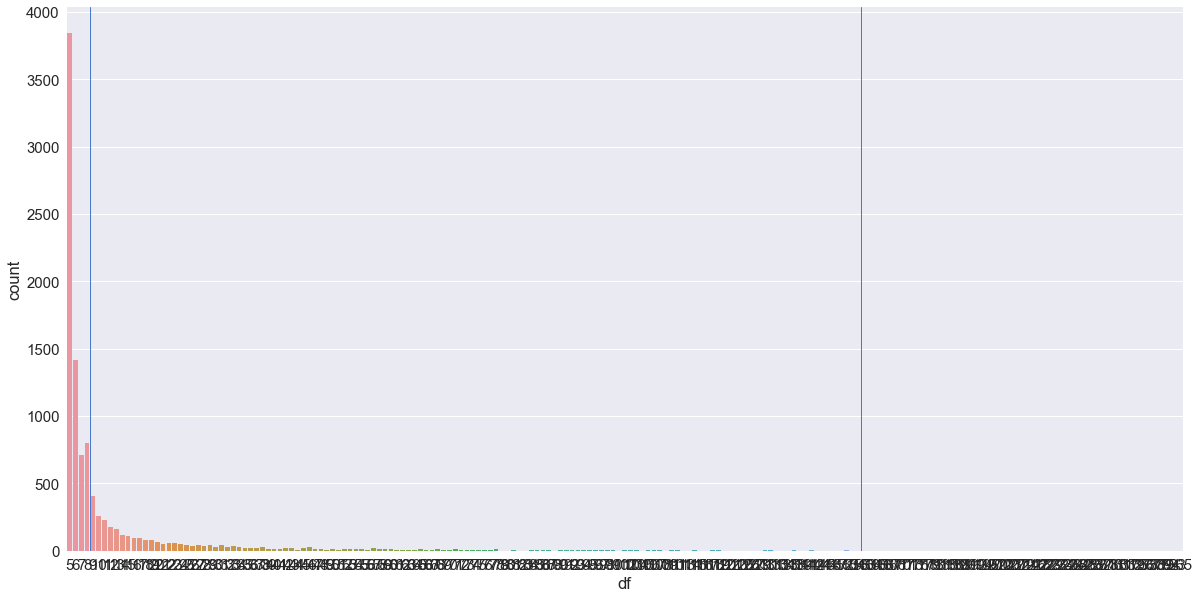

In [32]:
fig,ax=plt.subplots(figsize=(20,10))
ax.axvline(x=3.5,linewidth = 1)
ax.axvline(x=135.5,linewidth = 1)
distribuzione_frequenze(train_texts,"train",ngrammi=(1,3),min_df=1,max_df=0.5)

9

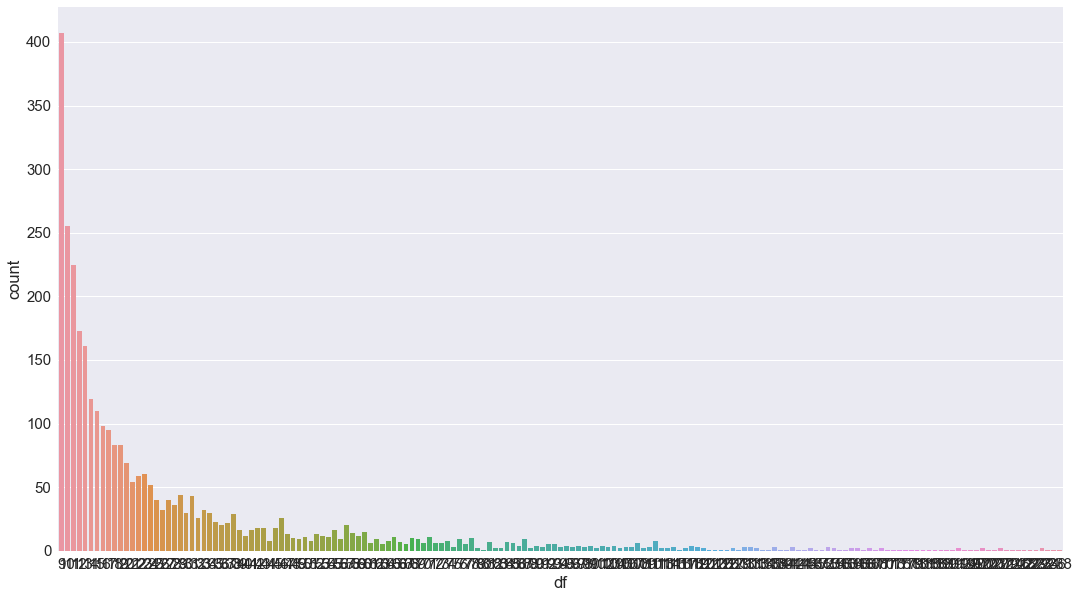

In [27]:
distribuzione_frequenze(train_texts,"train",ngrammi=(1,3),min_df=9,max_df=0.2)

In [11]:
#Magari inserire il tSNE

In [14]:
tf = CountVectorizer(max_features=1000000, lowercase=True, min_df=9,max_df=0.5).fit(train_texts)
tf_terms = tf.get_feature_names()
tf_train = tf.transform(train_texts)
ldax = LatentDirichletAllocation(max_iter=50, learning_method='online', random_state=0,n_components=12).fit(tf_train.toarray())
ldax_train = ldax.transform(tf_train.toarray())

In [55]:
n = 15
pd.set_option('display.max_colwidth', -1)
visualisssa_topics(ldax, tf_terms, n).head(12)

,Termini piu' probabili per topic
Topic,
0,nuov app dat prim ue milion privacy garant applic incontr controll aggiorn internet svilupp pubblic
1,stat mag arrest due anni eur dop uom giorn oggi accus lavor person alcun carabinier
2,lingu prem and of nuov rom giugn anni edizion mag stat album campagn to
3,sol anni prim part vit cos film raccont stat dop anno arriv molt poi giorn
4,artist oper teatr mostr collezion leonard stor berluscon fin part marm nuov rom fogl anni
5,ministr salvin govern mai stat leg matte legg dett m5s camer vot arriv intern ital
6,ital stat rom italian europe nat nazional paes fra mag finanziar banc cresc rapport fin
7,punt cal bors mil dop dollar mag eur parig usa ced titol spread daz messic
8,migrant genov port mag nav maestr rom cagliar arriv citt muse storic inaugur lib bord
